# EDA on Fossil-Fuel CO2 Emissions

<font size=3> The dataset is a time series of Carbon Dioxide (CO2) emissions from fossil-fuel combustion and cement manufacture. The data comes from [Appalachian Energy Center](https://energy.appstate.edu/cdiac-appstate/data-products) which supports development of clean energy technologies. You can find the dataset [here](https://energy.appstate.edu/sites/default/files/nation.1751_2019.xlsx).
</font>

<font size=3> The dataset contains the estimates of CO2 emissions from different fuel types like solid, liquid, gaseous fossil fuels of different nations in the world. Per capita CO2 emissions and emissions from international trade (bunker fuels) are included as well.
    </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import plotly.express as px

In [2]:
df = pd.read_excel('nation.1751_2019.xlsx')
df.head()

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0.0,NaN,NaN,0.0
1,AFGHANISTAN,1950,23,6.0,18.0,0.0,0.0,NaN,0.003143,0.0
2,AFGHANISTAN,1951,25,7.0,18.0,0.0,0.0,NaN,0.003299,0.0
3,AFGHANISTAN,1952,25,9.0,17.0,0.0,0.0,NaN,0.003338,0.0
4,AFGHANISTAN,1953,29,10.0,18.0,0.0,0.0,NaN,0.003701,0.0


In [3]:
# Changing the nation from all caps to only the first letter capital of each word

df.Nation = df.Nation.apply(lambda x: x.title())

In [4]:
# On a further look into the nations, the names of nations do not match especially when we try to make Chorpleth maps. 
# Hence checked with the json file and changes the names accordingly.

df.Nation[df.Nation == 'United States Of America'] = 'United States of America'
df.Nation[df.Nation == 'China (Mainland)'] = 'China'
df.Nation[df.Nation == 'France (Including Monaco)'] = 'France'
df.Nation[df.Nation == 'Italy (Including San Marino)'] = 'Italy'
df.Nation[df.Nation == 'Plurinational State Of Bolivia'] = 'Bolivia'
df.Nation[df.Nation == 'Democratic People S Republic Of Korea'] = 'North Korea'
df.Nation[df.Nation == 'Republic Of Korea'] = 'South Korea'
df.Nation[df.Nation == 'Islamic Republic Of Iran'] = 'Iran'
df.Nation[df.Nation == 'Myanmar (Formerly Burma)'] = 'Myanmar'
df.Nation[df.Nation == 'Viet Nam'] = 'Vietnam'
df.Nation[df.Nation == 'Bosnia & Herzegovina'] = 'Bosnia and Herzegovina'
df.Nation[df.Nation == 'Serbia'] = 'Republic of Serbia'
df.Nation[df.Nation == 'Republic Of Moldova'] = 'Moldova'
df.Nation[df.Nation == 'Republic Of Sudan'] = 'Sudan'
df.Nation[df.Nation == 'Republic Of South Sudan'] = 'South Sudan'
df.Nation[df.Nation == 'Democratic Republic Of The Congo (Formerly Zaire)'] = 'Democratic Republic of the Congo'
df.Nation[df.Nation == 'United Republic Of Tanzania'] = "United Republic of Tanzania"
df.Nation[df.Nation == 'Libyan Arab Jamahiriyah'] = 'Libya'
df.Nation[df.Nation == 'Cote D Ivoire'] = 'Ivory Coast'
df.Nation[df.Nation == 'Republic Of Cameroon'] = 'Cameroon'
df.Nation[df.Nation == 'Congo'] = 'Republic of the Congo'
df.Nation[df.Nation == 'Syrian Arab Republic'] = 'Syria'

In [5]:
df.shape

(18547, 10)

In [6]:
# Changing the name of the columns to something smaller. 

df.columns = ['Nation','Year','Total_CO2','Solid_fuel', 'Liquid_fuel',
             'Gas_fuel', 'Cement_Production', 'Gas_flaring','Per_capita_CO2', 'Bunker_fuel']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18547 entries, 0 to 18546
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nation             18547 non-null  object 
 1   Year               18547 non-null  int64  
 2   Total_CO2          18547 non-null  int64  
 3   Solid_fuel         12979 non-null  float64
 4   Liquid_fuel        18199 non-null  float64
 5   Gas_fuel           10514 non-null  float64
 6   Cement_Production  18089 non-null  float64
 7   Gas_flaring        2626 non-null   float64
 8   Per_capita_CO2     13024 non-null  float64
 9   Bunker_fuel        18527 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.4+ MB


<font size=3> We can see that for some of the columns there are null values. These values are for types of fuel causing the emission like solid fuel, liquid fuel etc. As we have the Total_CO2, we can check with sum of all the emissions from fuel type available and the difference with total can be used to fill the NA available. Checking this in the coming cells.

In [8]:
df[df.Solid_fuel.isnull()]

,Nation,Year,Total_CO2,Solid_fuel,Liquid_fuel,Gas_fuel,Cement_Production,Gas_flaring,Per_capita_CO2,Bunker_fuel
338,Angola,1990,1393,NaN,676.0,276.0,33.0,409.0,0.119775,596.0
339,Angola,1991,1386,NaN,623.0,296.0,33.0,435.0,0.115285,599.0
340,Angola,1992,1413,NaN,625.0,291.0,37.0,460.0,0.113691,221.0
341,Angola,1993,1572,NaN,810.0,286.0,31.0,445.0,0.122489,251.0
342,Angola,1994,1058,NaN,354.0,265.0,30.0,409.0,0.079925,359.0
...,...,...,...,...,...,...,...,...,...,...
18439,Zanzibar,1965,9,NaN,9.0,NaN,0.0,NaN,NaN,0.0
18440,Zanzibar,1966,8,NaN,8.0,NaN,0.0,NaN,NaN,0.0
18441,Zanzibar,1967,9,NaN,9.0,NaN,0.0,NaN,NaN,0.0
18442,Zanzibar,1968,9,NaN,9.0,NaN,0.0,NaN,NaN,0.0


<font size=3> Above we can see all the rows for which Solid_fuel has null values. We can see that the sum of available data for different fuel types match with Total_CO2. This means we can simply replace NAN with 0. Below check the same for Gas_fuel and looking at the data it reaffirms our assumption that NANs are nothing but zeroes. 

In [10]:
df[df.Gas_fuel.isnull()]

,Nation,Year,Total_CO2,Solid_fuel,Liquid_fuel,Gas_fuel,Cement_Production,Gas_flaring,Per_capita_CO2,Bunker_fuel
88,Albania,1950,81,12.0,68.0,NaN,2.0,NaN,0.065970,0.0
198,Algeria,1950,1033,514.0,475.0,NaN,44.0,NaN,0.116143,612.0
199,Algeria,1951,1128,557.0,510.0,NaN,61.0,NaN,0.123337,616.0
200,Algeria,1952,1062,503.0,493.0,NaN,66.0,NaN,0.113062,563.0
201,Algeria,1953,1092,422.0,599.0,NaN,70.0,NaN,0.113158,620.0
...,...,...,...,...,...,...,...,...,...,...
18542,Zimbabwe,2015,3348,2200.0,985.0,NaN,163.0,NaN,0.239019,20.0
18543,Zimbabwe,2016,2876,1892.0,857.0,NaN,127.0,NaN,0.201038,33.0
18544,Zimbabwe,2017,2620,1611.0,881.0,NaN,129.0,NaN,0.179453,42.0
18545,Zimbabwe,2018,3218,1959.0,1108.0,NaN,151.0,NaN,0.215935,51.0


<font size=3> As we add all the columns and check with total, they match without considering nan. This means we can simply impute the nans with 0. 

In [9]:
df[['Solid_fuel', 'Liquid_fuel', 'Gas_fuel',
    'Cement_Production', 'Gas_flaring']] = df[['Solid_fuel', 'Liquid_fuel',
                                               'Gas_fuel','Cement_Production', 'Gas_flaring']].fillna(0)

In [10]:
df.Year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1900,
       1901, 1902, 1903, 1904, 1905, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897,
       1898, 1899, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
       1915, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 18

<font size=3> The years column has the data from 1780 to 2019. This is incredible if we have the data for all the countries for all these years. Lets check the data for the same. 

In [11]:
len(df[df.Year == 1800].Nation.unique()), len(df[df.Year == 1900].Nation.unique()), len(df[df.Year == 1950].Nation.unique()), len(df[df.Year == 2019].Nation.unique()) 

(5, 39, 160, 222)

* <font size=3> Unfortunately futher you go to the past, lesser the data for each country. We can check those countries and maybe understand from their vast historical. But for an overall perspective of the globe, it only makes sense to start from 1950 where we have data for 160 countries. For 2019 there is data for 222 countries. A difference of 72 countries. </font>

* <font size=3> The reason for this can be twofold. There are a lot of 'Today's' that did not exist in 1950. For example, USSR was a transcontinental country which had several today's countries (Russia, Ukraine, Georgia, Belorussia etc.) as part of it. USSR split in 1990 to all the countries like Russia, Ukraine etc. 

<font size=3> As the data for most of countries prior to 1950 is not available, creating a new dataframe from years 1950 to 2019. 

In [12]:
df_n = df[df.Year >1949]

In [13]:
df_n.head()

,Nation,Year,Total_CO2,Solid_fuel,Liquid_fuel,Gas_fuel,Cement_Production,Gas_flaring,Per_capita_CO2,Bunker_fuel
1,Afghanistan,1950,23,6.0,18.0,0.0,0.0,0.0,0.003143,0.0
2,Afghanistan,1951,25,7.0,18.0,0.0,0.0,0.0,0.003299,0.0
3,Afghanistan,1952,25,9.0,17.0,0.0,0.0,0.0,0.003338,0.0
4,Afghanistan,1953,29,10.0,18.0,0.0,0.0,0.0,0.003701,0.0
5,Afghanistan,1954,29,12.0,18.0,0.0,0.0,0.0,0.003733,0.0


In [14]:
# As the new data set has lot of indexes missing due to slicing the years, resetting the index. 

df_n.reset_index(inplace = True)
df_n.drop('index', axis=1, inplace = True)

* <font size=3> The Total_CO2 column does not include the emissions from Bunker_fuel. We need to create a new column which adds this value to the Total_CO2 column.

* <font size=3> Adding an additional row at the end which adds all rows to find the sum of emissions from each fuel type. This will be used to understand the emissions from each fuel from 1950. 

In [15]:
df_n['Total_all'] = df_n[['Total_CO2','Bunker_fuel']].sum(axis=1)
df_n.loc[len(df_n)] =  df_n.sum(axis=0)

In [16]:
df_n.iloc[13777,0] = 'Nation_agg'  #Changing the value of aggregated Nations
df_n.iloc[13777,1] = 0             # Changing the valye of aggregate years to 0. This will not be useful.

# Sum of Percapita emissions doesnt make any sense so changing it to mean. This value is generally not useful. 
df_n.iloc[13777,8] = df_n[:13777].Per_capita_CO2.mean()

In [17]:
df_n

,Nation,Year,Total_CO2,Solid_fuel,Liquid_fuel,Gas_fuel,Cement_Production,Gas_flaring,Per_capita_CO2,Bunker_fuel,Total_all
0,Afghanistan,1950,23,6.0,18.0,0.0,0.0,0.0,0.003143,0.0,23.0
1,Afghanistan,1951,25,7.0,18.0,0.0,0.0,0.0,0.003299,0.0,25.0
2,Afghanistan,1952,25,9.0,17.0,0.0,0.0,0.0,0.003338,0.0,25.0
3,Afghanistan,1953,29,10.0,18.0,0.0,0.0,0.0,0.003701,0.0,29.0
4,Afghanistan,1954,29,12.0,18.0,0.0,0.0,0.0,0.003733,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...
13773,Zimbabwe,2016,2876,1892.0,857.0,0.0,127.0,0.0,0.201038,33.0,2909.0
13774,Zimbabwe,2017,2620,1611.0,881.0,0.0,129.0,0.0,0.179453,42.0,2662.0
13775,Zimbabwe,2018,3218,1959.0,1108.0,0.0,151.0,0.0,0.215935,51.0,3269.0
13776,Zimbabwe,2019,3032,1880.0,998.0,0.0,154.0,0.0,0.199422,44.0,3076.0


## PLOT 1
### Which fuel type contributed the most to global CO2 emissions?
* <font size=3> The plot explains the proportion of emissions for each fuel type from 1950 to 2019 for all the Nations. 
* <font size=3> We can see that, Solid fuels has the major proportion of all global CO2 emissions followed by liquid fuel and gaseous fuels. 

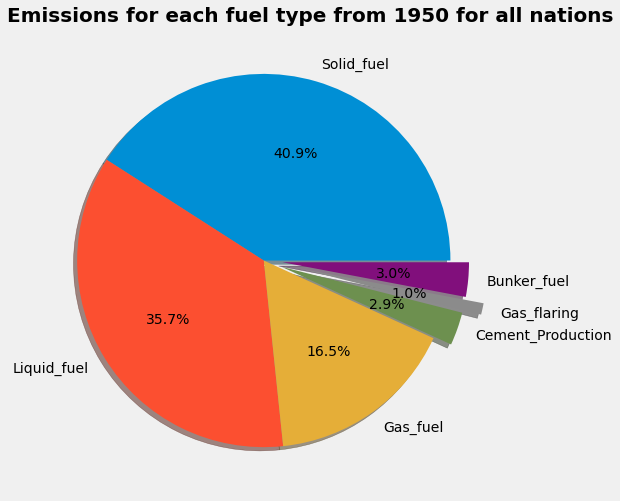

In [18]:
plt.style.use("fivethirtyeight")

a = df_n.loc[13777,['Solid_fuel','Liquid_fuel','Gas_fuel','Cement_Production','Gas_flaring','Bunker_fuel']]
explode=[0,0,0,0.1,0.2,0.1]
a.plot.pie(figsize=(8,8), pctdistance = .6, textprops={'fontsize': 14},
           autopct='%1.1f%%', explode=explode, shadow=True)

           
plt.title('Emissions for each fuel type from 1950 for all nations', fontsize = 20,fontweight="bold", x=0.6, y=1)
plt.ylabel('')
plt.show()

## PLOT 2
### Global CO2 emissions trend all time  

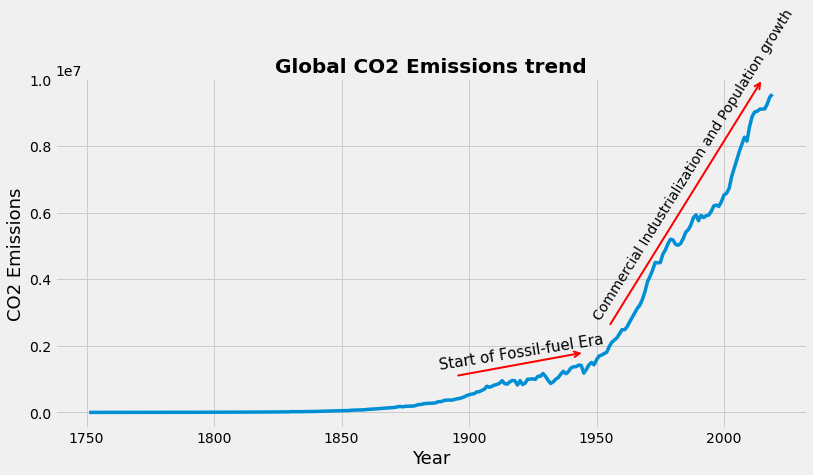

In [19]:
df.loc[:,['Year','Total_CO2']].groupby('Year').sum().plot.line(figsize=(12,6), legend=None, linewidth=3.5)

plt.annotate('',
             xy=(1945,0.18e7) #Head of the arrow at that location
             , xytext=(1895,1.1e6) #Base of the arrow
             ,xycoords='data',
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3',color='red',lw=2)
             )

plt.annotate("Start of Fossil-fuel Era",
            xy=(1888,1.22e6),
            rotation= 9,
              va = 'bottom', #text to be vertically bottom-alligned
              ha = 'left' # Left to right allignment,
             ,fontsize=15
             )

plt.annotate('',
             xy=(2015,1e7) #Head of the arrow at that location
             , xytext=(1955,2.6e6) #Base of the arrow
             ,xycoords='data',
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3',color='red',lw=2)
             )

plt.annotate("Commercial Industrialization and Population growth",
            xy=(1948,2.7e6),
            rotation= 58,
              va = 'bottom', #text to be vertically bottom-alligned
              ha = 'left' # Left to right allignment,
             ,fontsize=14
             )

plt.title('Global CO2 Emissions trend', fontsize = 20,fontweight="bold", x=0.5, y=1)
plt.xlabel('Year', fontsize=18)
plt.ylabel("CO2 Emissions",fontsize=18)
plt.show()

<font size=3> The global CO2 emissions started to increase from 1900 and literally skyrocketed from 1950 and it doesnt look like it is halting. Prior to 1850, the emissions are pretty mainly because of the missing data but also it was checked that, it is the industrialised countries which generally contributed globally and the data for those countries is available. The incredible increase from 1900 is mainly because of industrialization and population growth.

## PLOT 3
### What are the top 10 and bottom 10 CO2 emitted countries from 1990?  

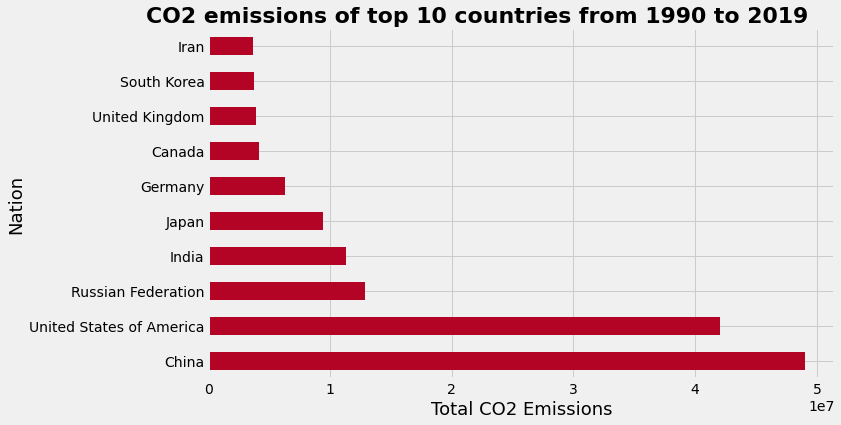

In [21]:
# Top 10 countries of Total CO2 emissions from 1990 to 2019

df_1990_total = df_n[df_n.Year > 1990].groupby('Nation').sum()[['Total_CO2','Solid_fuel', 'Liquid_fuel',
             'Gas_fuel', 'Cement_Production', 'Gas_flaring', 'Bunker_fuel']]

df_1990_total.sort_values('Total_CO2',ascending=False).Total_CO2.head(10).plot.barh(cmap = 'coolwarm_r', figsize=(10,6))

plt.xlabel("Total CO2 Emissions", fontsize = 18)
plt.ylabel("Nation", fontsize=18)

plt.title("CO2 emissions of top 10 countries from 1990 to 2019", fontsize= 22, fontweight="bold", x=0.43, y=1)
plt.show()

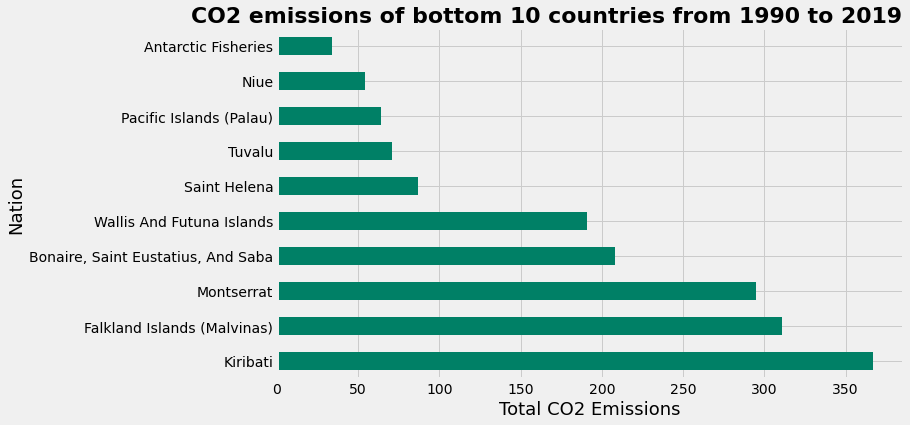

In [22]:
# Bottom 10 countries of Total CO2 emissions from 1990

df_1990_total.sort_values('Total_CO2',ascending=False).Total_CO2.tail(10).plot.barh(cmap = 'summer', figsize=(10,6))

plt.xlabel("Total CO2 Emissions", fontsize = 18)
plt.ylabel("Nation", fontsize=18)

plt.title("CO2 emissions of bottom 10 countries from 1990 to 2019", fontsize= 22, fontweight="bold", x=0.43, y=1)
plt.show()

## PLOT 4
### What is the trend for top 5 countries which were found from previous plot?  

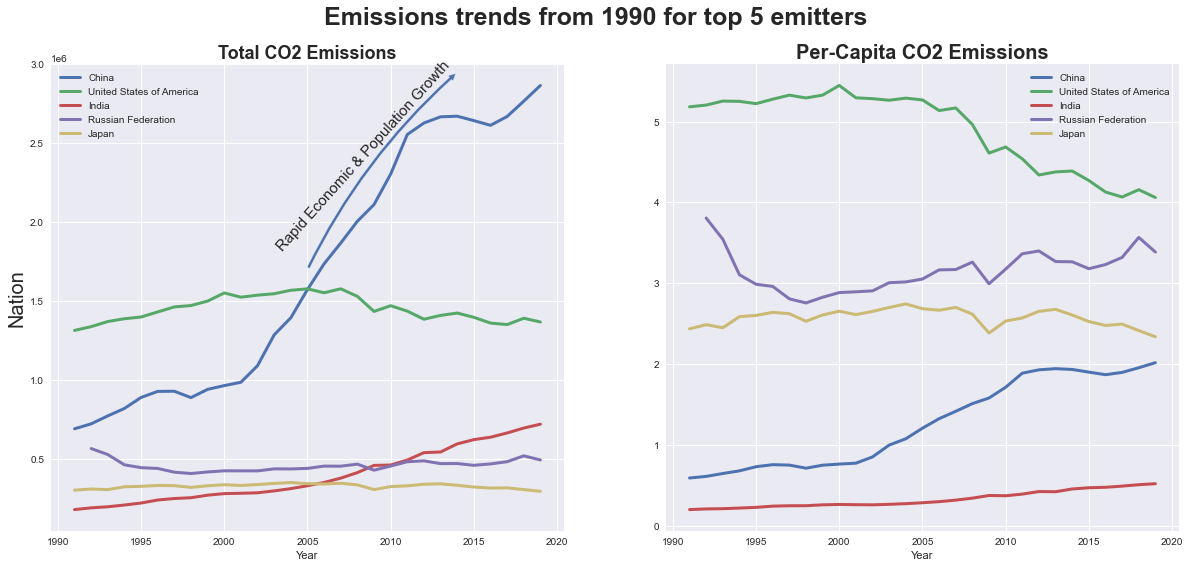

In [24]:
plt.style.use('seaborn')

fig, (ax1, ax2) = plt.subplots(1, 2)

df_n.loc[(df_n['Nation'] == 'China') & (df_n.Year>1990)].plot.line(x='Year', y ='Total_CO2', 
                                                                   ax=ax1, figsize=(18,8), label = 'China'
                                                                  , linewidth=3)

df_n.loc[(df_n['Nation'] == 'United States of America') & (df_n.Year>1990)].plot.line(x='Year',
                                                                                      y ='Total_CO2',
                                                                                      ax=ax1, label = 'United States of America'
                                                                                     , linewidth=3)

df_n.loc[(df_n['Nation'] == 'India') & (df_n.Year>1990)].plot.line(x='Year', y ='Total_CO2',
                                                                   ax=ax1, label = 'India'
                                                                  , linewidth=3)

df_n.loc[(df_n['Nation'] == 'Russian Federation') & (df_n.Year>1990)].plot.line(x='Year', 
                                                                                y ='Total_CO2',
                                                                                ax=ax1, label = 'Russian Federation'
                                                                               , linewidth=3)

df_n.loc[(df_n['Nation'] == 'Japan') & (df_n.Year>1990)].plot.line(x='Year', 
                                                                   y ='Total_CO2', 
                                                                   ax=ax1, label = 'Japan'
                                                                  , linewidth=3)

ax1.set_ylabel("Nation", fontsize=20)
ax1.set_title("Total CO2 Emissions", fontsize=18, fontweight='bold')

########################################################################################################################33

df_n.loc[(df_n['Nation'] == 'China') & (df_n.Year>1990)].plot.line(x='Year', y ='Per_capita_CO2', 
                                                                   ax=ax2,  label = 'China'
                                                                  , linewidth=3)

df_n.loc[(df_n['Nation'] == 'United States of America') & (df_n.Year>1990)].plot.line(x='Year',
                                                                                      y ='Per_capita_CO2',
                                                                                      ax=ax2, label = 'United States of America'
                                                                                     , linewidth=3)

df_n.loc[(df_n['Nation'] == 'India') & (df_n.Year>1990)].plot.line(x='Year', y ='Per_capita_CO2',
                                                                   ax=ax2, label = 'India'
                                                                  , linewidth=3)

df_n.loc[(df_n['Nation'] == 'Russian Federation') & (df_n.Year>1990)].plot.line(x='Year', 
                                                                                y ='Per_capita_CO2',
                                                                                ax=ax2, label = 'Russian Federation'
                                                                               , linewidth=3)

df_n.loc[(df_n['Nation'] == 'Japan') & (df_n.Year>1990)].plot.line(x='Year', 
                                                                   y ='Per_capita_CO2', 
                                                                   ax=ax2, label = 'Japan'
                                                                  , linewidth=3)

ax2.set_title("Per-Capita CO2 Emissions", fontsize=20, fontweight='bold')

fig.suptitle('Emissions trends from 1990 for top 5 emitters',fontsize=25, fontweight='bold')

ax1.annotate('',
             xy=(2014,2.95e6) #Head of the arrow at that location
             , xytext=(2005,1.7e6) #Base of the arrow
             ,xycoords='data',
             arrowprops = dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.1"),
             )

ax1.annotate("Rapid Economic & Population Growth",
            xy=(2003,1.8e6),
            rotation= 48,
              va = 'bottom', #text to be vertically bottom-alligned
              ha = 'left' # Left to right allignment,
             ,fontsize=15
             )

plt.show()

* <font size=3> We can see that United States has beend the leading emitter till 2005. They have stabilized their emissions in this century.
* <font size=3> Whereas for China, the emissions started to skyrocket from 2000. This mainly due to the China's rapid economic and population growth. 
* <font size=3> Japan and Russia also seem to have stabilized their emissions, whereas India's emissions are increasing with increase in economy following China.

## PLOT 5
### Choropleth map for emissions for all countries in 2019  

In [27]:
px.choropleth(df_n[df_n.Year == 2019], locations='Nation', scope='world',
                    locationmode="country names", color='Total_all',
             color_continuous_scale='spectral_r')

## PLOT 6
### Choropleth map for per capita emissions for all countries in 2019  

In [28]:
px.choropleth(df_n[df_n.Year == 2019], locations='Nation',color_continuous_scale='spectral_r',
                    locationmode="country names", color='Per_capita_CO2')

## PLOT 7
### Choropleth map with animation frame as year for both per-capita and total emissions for all countries in 2019  

In [29]:
px.choropleth(df_n, locations='Nation',color_continuous_scale='spectral_r',
                    locationmode="country names", color='Per_capita_CO2', animation_frame='Year')

* <font size=3> The total CO2 emissions in 2019 for all countries shows a different picture to that of PerCapita emissions of each country. 
* <font size=3> Though, overall emissions of China is double of USA, per capita emissions of USA is double of China. 
* <font size=3> India in 2019 is the 3rd overall emitter of CO2 emissions. But when it comes to percapita, there are several other countries which dominate in this factor like Australia, USA, Canada, Saudi Arabia, South Africa, Egypt, Algeria every European country. 

In [35]:
px.choropleth(df_n, locations='Nation',
                    locationmode="country names", color='Total_all', animation_frame='Year')

<font size=3> I wanted to save the animations above as gifs, but I was getting errors using plotly functions to make it a gif. So I went for a shortcut at the time. I saved images for each year as a png in local drive and loaded them and combined all the images into a gif in the following cell. 

In [38]:
from PIL import Image

im1 = Image.open('newplot (2).png')
im2 = Image.open('newplot (4).png')
im3 = Image.open('newplot (5).png')
im4 = Image.open('newplot (6).png')

im5 = Image.open('newplot (7).png')
im6 = Image.open('newplot (8).png')
im7 = Image.open('newplot (9).png')
im8 = Image.open('newplot (10).png')

im9 = Image.open('newplot (11).png')
im10 = Image.open('newplot (12).png')
im11 = Image.open('newplot (13).png')
im12 = Image.open('newplot (14).png')
im13 = Image.open('newplot (15).png')
im14 = Image.open('newplot (17).png')
im15 = Image.open('newplot (18).png')

im1.save("out.gif", save_all=True, append_images=[im2,im3, im4,im5,im6,
                                                  im7,im8,im9, im10,im11,im12, im13, im14,im15], duration=1000, loop=0)

## PLOT 8
### WordCloud of country with fontsize equalling to total emissions by that particular country.  

In [49]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

from PIL import Image
import urllib


fig = plt.figure(figsize=(18, 18))

a = df.groupby("Nation").sum()
a.reset_index(inplace=True)

k = a.sort_values('Total_CO2', ascending=False).head(45)

d = {w: f for w, f in
    zip(k.Nation, k.Total_CO2
         )}

mask =  np.array(Image.open(urllib.request.urlopen('https://media.istockphoto.com/id/886198998/vector/rain-cloud.jpg?s=612x612&w=0&k=20&c=FRUNuHyM6TmevFhXAEem6JoW89fVwLmN8Sntp37t2-g=')))

<Figure size 1296x1296 with 0 Axes>

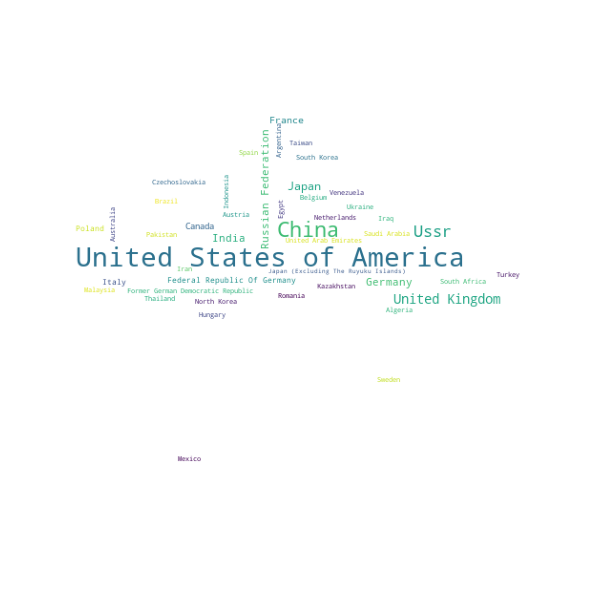

In [50]:
fig = plt.figure(figsize=(10,10))

wordcloud = WordCloud(background_color='white', mask=mask )
wordcloud.generate_from_frequencies(frequencies=d)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()